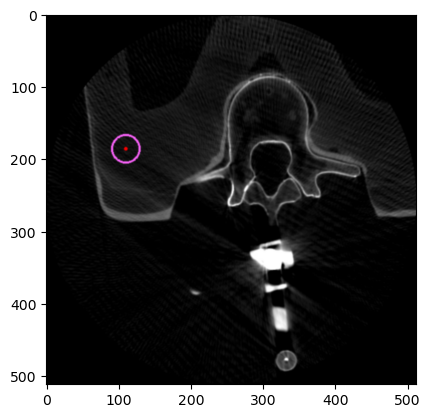

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read image.
img = cv2.imread('TCA_Training/59.png', cv2.IMREAD_COLOR)

brightness_factor = 5  # Adjust this value as needed.

# Multiply the pixel values by the brightness factor.
enhanced_img = cv2.convertScaleAbs(img, alpha=brightness_factor, beta=0)

# Convert the enhanced image to grayscale.
gray = cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2GRAY)

# Binarize the grayscale image.
_, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Fill in the shapes (contours) in the binary image.
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))


# Apply Hough transform on the filled binary image.
detected_circles = cv2.HoughCircles(binary_image,
                                   cv2.HOUGH_GRADIENT, 1, 20, param1=50,
                                   param2=5, minRadius=0, maxRadius=20)

# Draw circles that are detected.
if detected_circles is not None:
    # Convert the circle parameters a, b, and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))

    # Limit the number of circles to be drawn (e.g., 3 circles).
    num_circles_to_draw = 1

    for i, pt in enumerate(detected_circles[0, :]):
        if i >= num_circles_to_draw:
            break
        a, b, r = pt[0], pt[1], pt[2]

        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (255, 100, 255), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (255, 0, 0), 2)

    plt.imshow(img, cmap='gray', interpolation='bicubic')
    plt.show()
else:
    print("Nothing to see here!")